# Setup

In [1]:
import functools
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns

from network import Net, NetDiscovery
from diff_equation import *

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
torch.manual_seed(42)
np.random.seed(10)

# Training Data and Nondimensionalization

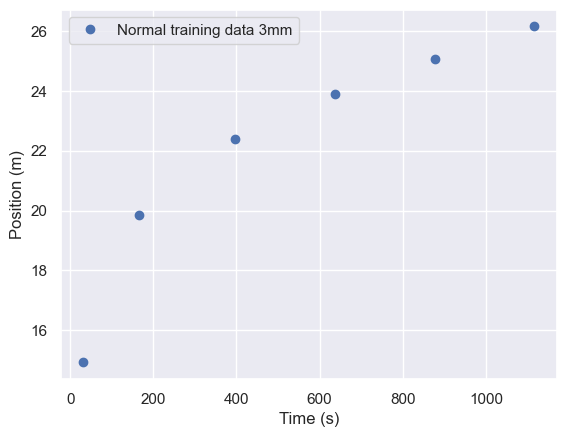

In [2]:
# Grab training data
train_t, train_x, nondim_train_t, nondim_train_x = position_3mm_droplet()

# Plot training data
plt.plot(train_t, train_x, 'o')
plt.legend(['Normal training data 3mm'])
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.show()

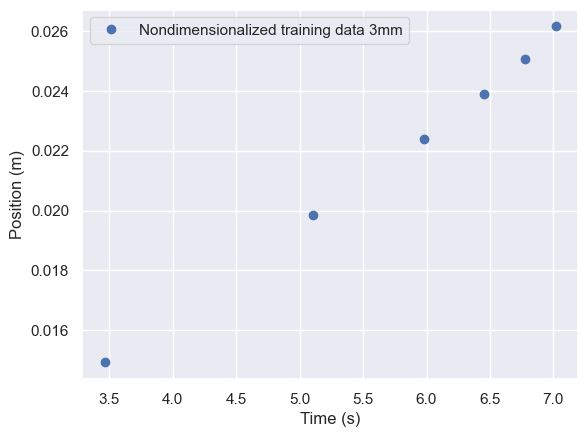

In [3]:
plt.plot(nondim_train_t, nondim_train_x, 'o')
plt.legend(['Nondimensionalized training data 3mm'])
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.show()

# Trying Different Loss Weights for Physics Loss + Data Loss

In [4]:
# different_lambdas = torch.linspace(0, 500, 25)
# losses_each_lambda = torch.empty(len(different_lambdas))

# for i in range(0, len(different_lambdas)):
#     net = Net(1,1, loss2=physics_loss, epochs=5000, loss2_weight=different_lambdas[i], lr=0.5).to(DEVICE)
#     losses_each_lambda[i] = net.fit(train_t, train_x)[-1]

# plt.plot(different_lambdas, losses_each_lambda)
# plt.legend(['Loss vs. Lambda'])
# plt.ylabel('Loss')
# plt.xlabel('Lambda')

# Learn the Model

Epoch 0/5000, data loss: 113971.3359375, physics loss: 955867.75
Epoch 500/5000, data loss: 586.3408813476562, physics loss: 3.1069886684417725
Epoch 1000/5000, data loss: 160.29171752929688, physics loss: 2.3619909286499023
Epoch 1500/5000, data loss: 44.779109954833984, physics loss: 2.285341262817383
Epoch 2000/5000, data loss: 13.380434036254883, physics loss: 2.330461263656616
Epoch 2500/5000, data loss: 4.89255952835083, physics loss: 2.2863681316375732
Epoch 3000/5000, data loss: 2.170285940170288, physics loss: 2.2561025619506836
Epoch 3500/5000, data loss: 1.2694429159164429, physics loss: 2.23862886428833
Epoch 4000/5000, data loss: 0.7240943312644958, physics loss: 2.2435855865478516
Epoch 4500/5000, data loss: 0.3877700865268707, physics loss: 2.249708890914917


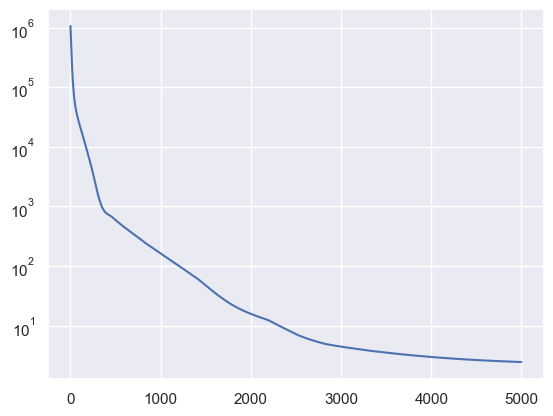

In [11]:
net = Net(1, 1, loss2=physics_loss, epochs=5000, loss1_weight=10000000, loss2_weight=0.00001, lr=1e-5).to(DEVICE)
losses = net.fit(nondim_train_t, nondim_train_x)
plt.plot(losses)
plt.yscale('log')

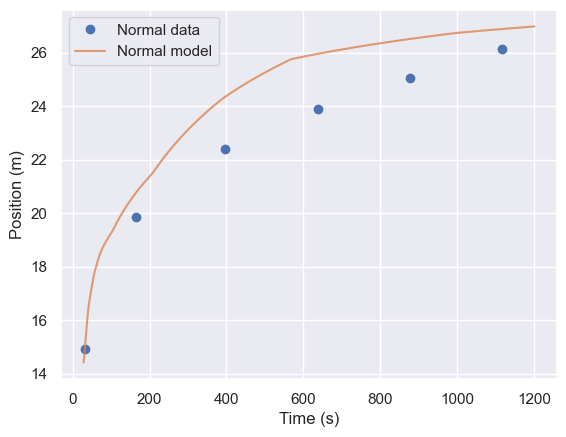

In [6]:
times = np.linspace(3.35, np.log(1200), 1200)
preds = net.predict(times)

plt.plot(train_t, train_x, 'o')
plt.plot(np.exp(times), x_0*preds, alpha=0.8)
plt.legend(['Normal data', 'Normal model'])
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.show()

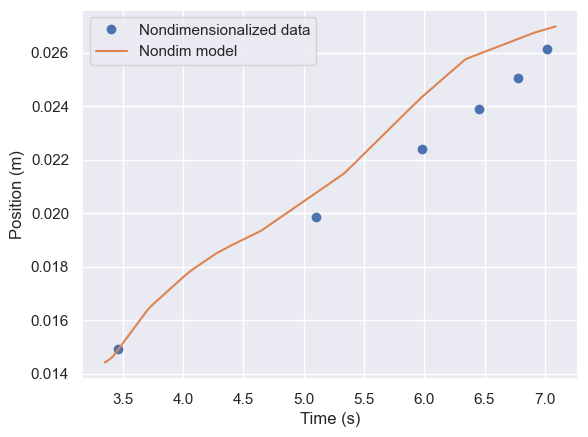

In [7]:
plt.plot(nondim_train_t, nondim_train_x, 'o')
plt.plot(times, preds)
plt.legend(['Nondimensionalized data', 'Nondim model'])
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.show()